I calculated correlation functions over the weekend; this notebook is going to plot them from the stored data.

In [50]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [51]:
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [52]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#sim = 'fox'
simnames = ['emu', 'fox', 'multidark_highres']
#scale_factors = [0.25,0.333,0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
sf = {sim: 1.0 for sim in simnames}
sf['multidark_highres'] = 1.001
data = defaultdict(list)

#for sf in scale_factors:
for sim in simnames:
    data[sim].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf[sim])) )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

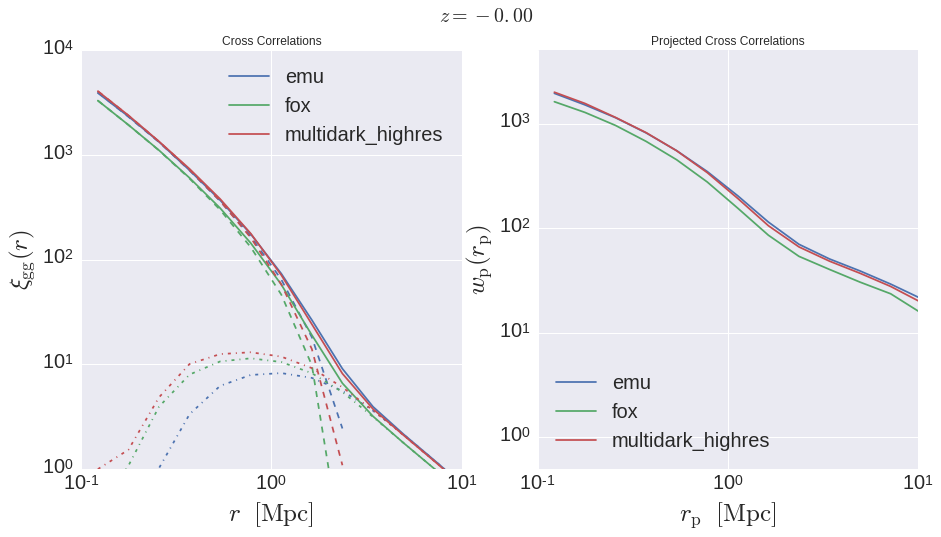

In [53]:
rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2
fig = plt.figure(figsize = (15, 7.5))
#for sf, color in zip(scale_factors, colors):
for sim, color in zip(simnames, colors):
    plt.subplot(121)
    rz = 1.0/sf[sim] -1 
    plt.plot(rbin_centers, data[sim][0],
             #label='$z = %.2f$'%rz, color=color)
             label = sim, color = color)
    plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    plt.plot(rbin_centers, data[sim][2], ls = '-.', color = color)

    plt.subplot(122)
    plt.plot(rbin_centers, data[sim][3],
             #label='$z = %.2f$'%rz,
             label = sim,
             color= color )
    
plt.subplot(121)
plt.title('Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.subplot(122)
plt.title('Projected Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 0.5, ymax = 5e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.suptitle('$z = %.2f$'%rz, fontsize = 20)
plt.show()

In [54]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'emu'
#simnames = ['emu', 'fox']
scale_factors = [0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
#sf = 1.0
data = defaultdict(list)

for sf in scale_factors:
#for sim in simnames:
    data[sf].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf)) )
    data[sf].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf))  )
    data[sf].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf))  )
    data[sf].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf)) )

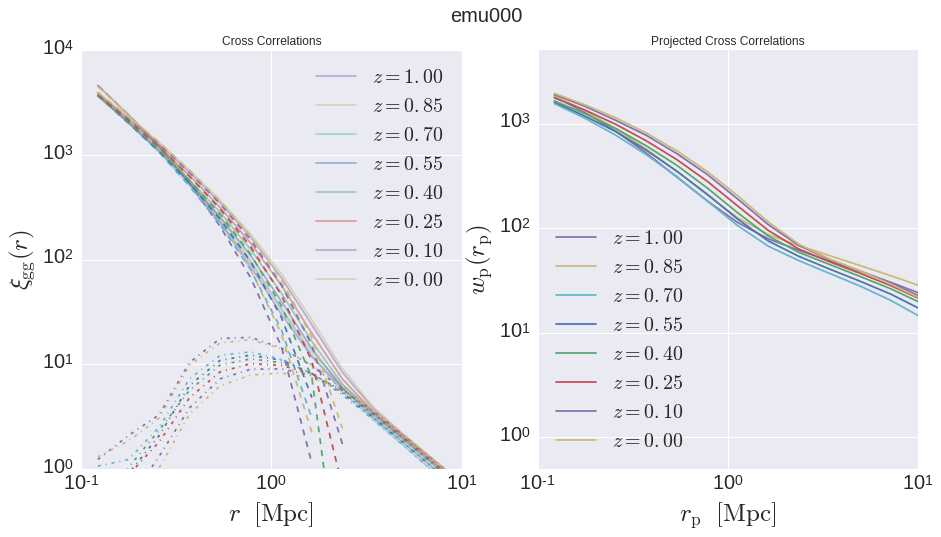

In [55]:
rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2
fig = plt.figure(figsize = (15, 7.5))
for sf, color in zip(scale_factors, colors):
#for sim, color in zip(simnames, colors):
    plt.subplot(121)
    rz = 1.0/sf -1 
    plt.plot(rbin_centers, data[sf][0], alpha = .5,
             label='$z = %.2f$'%rz, color=color)
             #label = sim, color = color)
    plt.plot(rbin_centers, data[sf][1], ls = '--', color = color)
    plt.plot(rbin_centers, data[sf][2], ls = '-.', color = color)

    plt.subplot(122)
    plt.plot(rbin_centers, data[sf][3],
             label='$z = %.2f$'%rz,
             #label = sim,
             color= color )
    
plt.subplot(121)
plt.title('Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.subplot(122)
plt.title('Projected Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 0.5, ymax = 5e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.suptitle(sim + '000', fontsize = 20)
plt.show()